In [1]:
from src.utils.Preprocessing import Preprocessing
from src.engine.RNN import EngineRNN
from config import FRAME_SIZE, SAMPLERATE, FRAME_SIZE, HOP, N_MELS, N_MFCC, OUT_DIM, DEVICE
from PodcastDataset import PodcastDataset
from torch.utils.data import DataLoader
from src.utils.utils import plt_losses

# Entrenamiento de mejor modelo

In [2]:
preprocessing = Preprocessing(frame_size=FRAME_SIZE,
                  hop = HOP, 
                  n_mels =N_MELS, 
                  n_fft = FRAME_SIZE, 
                  n_mfcc=N_MFCC,
                  samplerate=SAMPLERATE)

In [3]:
model = EngineRNN(input_size = N_MFCC+N_MELS+2+12,
                         hidden_size = 64,
                         num_rnn_layers = 3,
                         num_mlp_layers = 2,
                         output_size = OUT_DIM, 
                         dropout = 0.2,
                         batch_size = 64,
                         learning_rate = 0.00047,
                         preprocessing = preprocessing)

In [ ]:
%%capture
model.train(epochs=20,patience=5,delta=1e-4,name="modelo")

# Se carga modelo

In [4]:
model.load_model("modelo.pth")

c:\Users\sebas\Desktop\DL_señales\T3\src\engine\RNN.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))


# Se evalúa modelo

## Conjunto de test

Evaluación:   0%|          | 0/600 [00:00<?, ?it/s]

Evaluación: 100%|██████████| 600/600 [00:50<00:00, 11.79it/s]


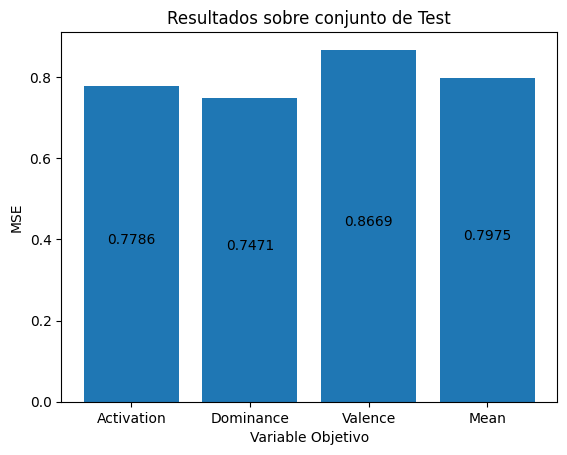

MSE Activation: 0.7786105912010144, MSE dominance: 0.7470600523139359, MSE valence: 0.8668568152394585, MSE mean: 0.7975091529181363


In [5]:
a,b = model.evaluate(DataLoader(PodcastDataset(dir="test",preprocessing = preprocessing),batch_size=1,shuffle=False),"Resultados sobre conjunto de Test",return_outputs=True)

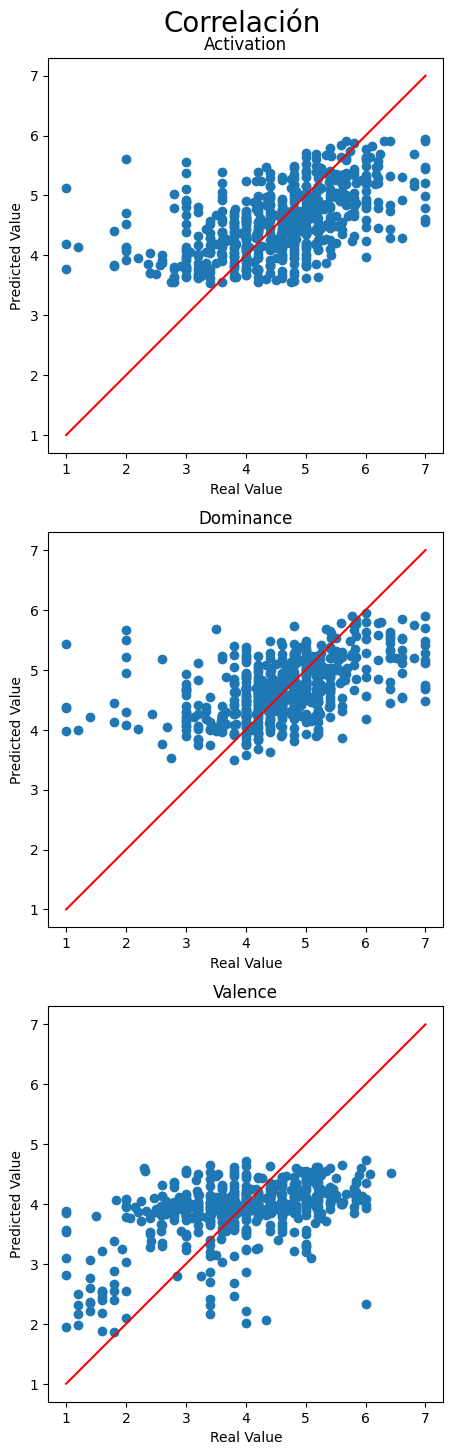

In [6]:
import matplotlib.pyplot as plt
import numpy as np
"""a: real_values, b: predicted_values"""
fig, axs = plt.subplots(3,sharey=True,figsize=(16,16))
fig.suptitle("Correlación",fontsize=20,x=0.51)
plt.subplots_adjust(top=0.95)
i=0
for key in a.keys():
    axs[i].scatter(a[key],b[key])
    axs[i].plot(np.array([1,7]),np.array([1,7]),c="r")
    axs[i].set_title(key.capitalize())
    axs[i].set_xlabel("Real Value")
    axs[i].set_ylabel("Predicted Value")
    axs[i].set(adjustable="box",aspect="equal")
    i+=1

In [7]:
from scipy.stats import pearsonr
corr_activation = pearsonr(a["activation"],b["activation"]).statistic
corr_dominance = pearsonr(a["dominance"],b["dominance"]).statistic
corr_valence = pearsonr(a["valence"],b["valence"]).statistic
print(f"Correlación para activation: {corr_activation}")
print(f"Correlación para dominance: {corr_dominance}")
print(f"Correlación para valence: {corr_valence}")

Correlación para activation: 0.5406565565931116
Correlación para dominance: 0.4770555773272743
Correlación para valence: 0.48858915768762723


## Conjunto de validación

Evaluación:   0%|          | 0/1200 [00:00<?, ?it/s]

Evaluación: 100%|██████████| 1200/1200 [01:25<00:00, 14.06it/s]


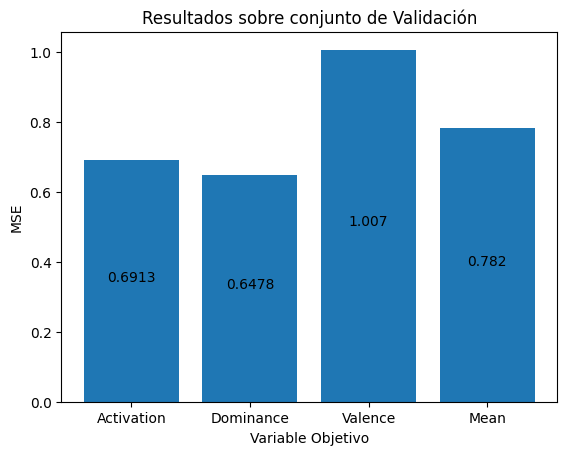

MSE Activation: 0.6913167426992266, MSE dominance: 0.6478036278669911, MSE valence: 1.0070133920930202, MSE mean: 0.7820445875530794


In [10]:
a,b = model.evaluate(DataLoader(PodcastDataset(dir="validation",preprocessing = preprocessing),batch_size=1,shuffle=False),"Resultados sobre conjunto de Validación",return_outputs=True)

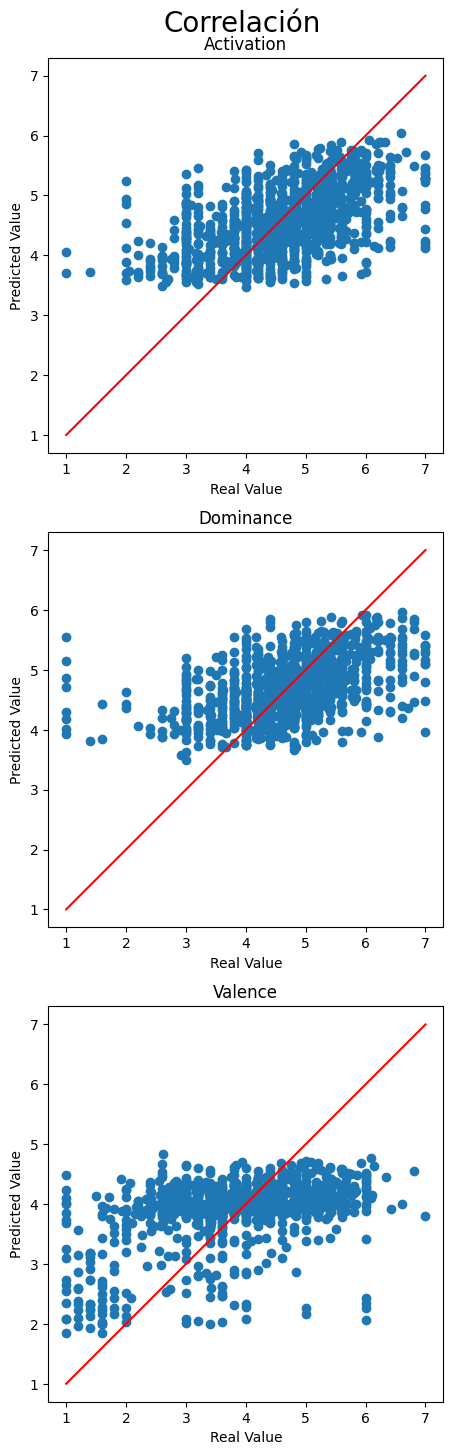

In [12]:
fig, axs = plt.subplots(3,sharey=True,figsize=(16,16))
fig.suptitle("Correlación",fontsize=20,x=0.51)
plt.subplots_adjust(top=0.95)
i=0
for key in a.keys():
    axs[i].scatter(a[key],b[key])
    axs[i].plot(np.array([1,7]),np.array([1,7]),c="r")
    axs[i].set_title(key.capitalize())
    axs[i].set_xlabel("Real Value")
    axs[i].set_ylabel("Predicted Value")
    axs[i].set(adjustable="box",aspect="equal")
    i+=1

In [13]:
from scipy.stats import pearsonr
corr_activation = pearsonr(a["activation"],b["activation"]).statistic
corr_dominance = pearsonr(a["dominance"],b["dominance"]).statistic
corr_valence = pearsonr(a["valence"],b["valence"]).statistic
print(f"Correlación para activation: {corr_activation}")
print(f"Correlación para dominance: {corr_dominance}")
print(f"Correlación para valence: {corr_valence}")

Correlación para activation: 0.5230778359048915
Correlación para dominance: 0.46223507008003967
Correlación para valence: 0.43995550878444206


## Conjunto de train

Evaluación:   0%|          | 0/4200 [00:00<?, ?it/s]

Evaluación: 100%|██████████| 4200/4200 [05:01<00:00, 13.95it/s]


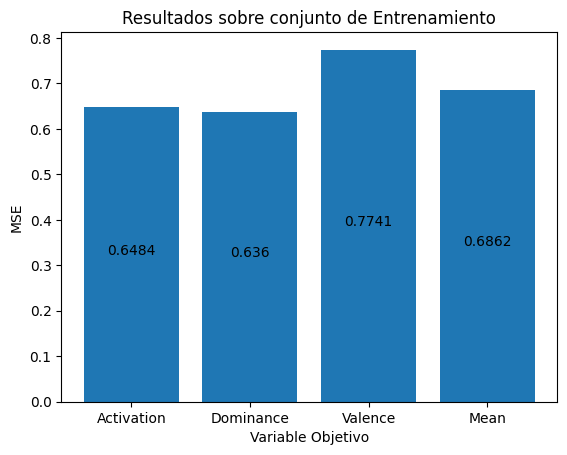

MSE Activation: 0.6483872656926387, MSE dominance: 0.6360260035650667, MSE valence: 0.774066293527633, MSE mean: 0.6861598542617795


In [14]:
a,b = model.evaluate(DataLoader(PodcastDataset(dir="train",preprocessing = preprocessing),batch_size=1,shuffle=False),"Resultados sobre conjunto de Entrenamiento",return_outputs=True)

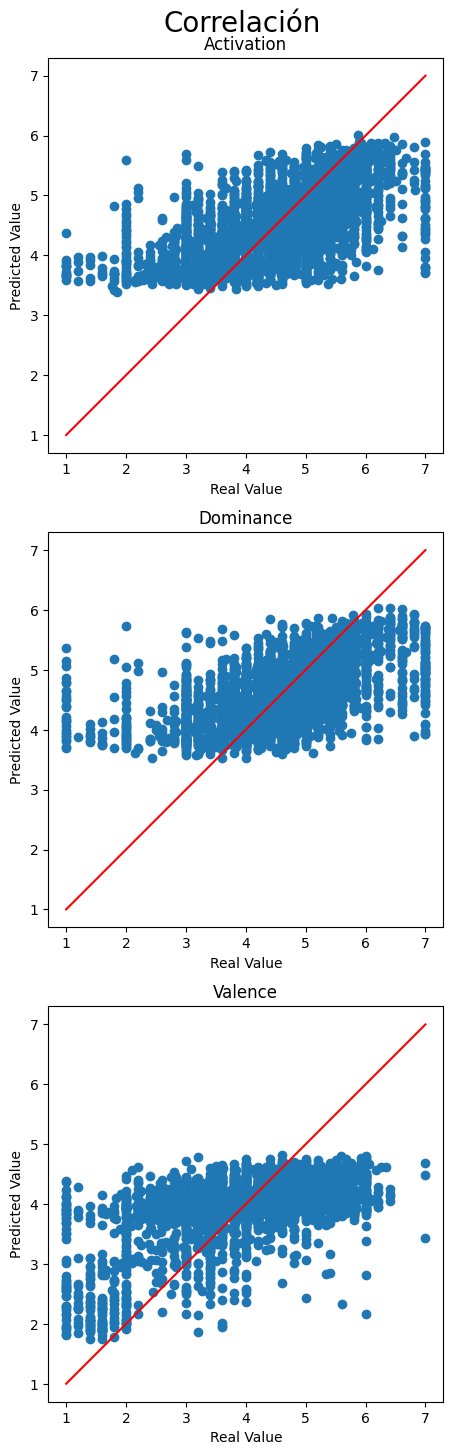

In [15]:
fig, axs = plt.subplots(3,sharey=True,figsize=(16,16))
fig.suptitle("Correlación",fontsize=20,x=0.51)
plt.subplots_adjust(top=0.95)
i=0
for key in a.keys():
    axs[i].scatter(a[key],b[key])
    axs[i].plot(np.array([1,7]),np.array([1,7]),c="r")
    axs[i].set_title(key.capitalize())
    axs[i].set_xlabel("Real Value")
    axs[i].set_ylabel("Predicted Value")
    axs[i].set(adjustable="box",aspect="equal")
    i+=1

In [16]:
from scipy.stats import pearsonr
corr_activation = pearsonr(a["activation"],b["activation"]).statistic
corr_dominance = pearsonr(a["dominance"],b["dominance"]).statistic
corr_valence = pearsonr(a["valence"],b["valence"]).statistic
print(f"Correlación para activation: {corr_activation}")
print(f"Correlación para dominance: {corr_dominance}")
print(f"Correlación para valence: {corr_valence}")

Correlación para activation: 0.5875237640193072
Correlación para dominance: 0.548866703307979
Correlación para valence: 0.5411979677401229


## Losses

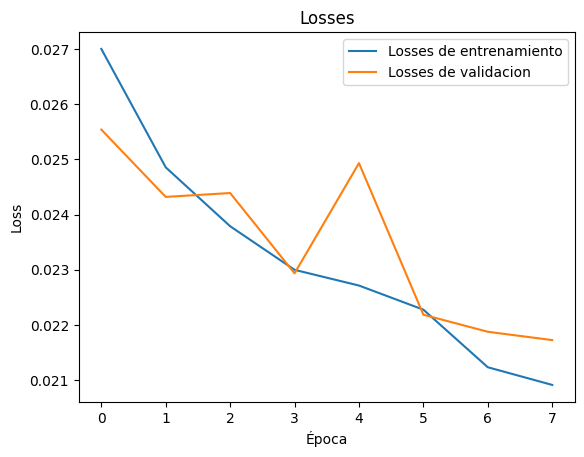

In [11]:
plt_losses("losses/modelo.csv","Losses")